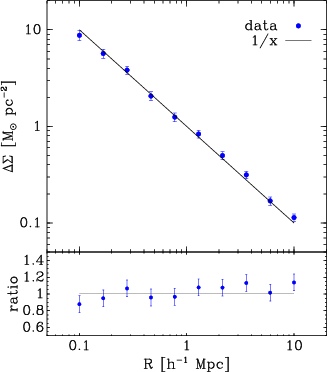

In [1]:
import biggles
from numpy import log10, logspace, random

biggles.configure('default', 'fontsize_min', 2.5)

# set up some data
x = logspace(log10(0.1), log10(10.0), 10)

model = 1.0 / x
yerr = 0.1 * model
y = model + yerr * random.normal(size=x.size)

yratio = y / model
yratio_err = yerr / model


# build the FramedArray.  Note the x axis
# is set to log for all plots
a = biggles.FramedArray(
    2, 1,
    xlog=True,
    aspect_ratio=1.2,
    xlabel=r'$R [h^{-1} Mpc]$',
    row_fractions=[0.75, 0.25],
)

color = 'blue'
sym = 'filled circle'

mcurve = biggles.Curve(x, model)
pts = biggles.Points(x, y, type=sym, color=color)
epts = biggles.SymmetricErrorBarsY(x, y, yerr, color=color)

pts.label = 'data'
mcurve.label = '1/x'

key = biggles.PlotKey(0.9, 0.9, [pts, mcurve], halign='right')
a[0, 0] += pts, epts, mcurve, key
a[0, 0].ytitle = r'$\Delta\Sigma  [M_{\odot} pc^{-2}]$'
a[0, 0].yrange = [0.05, 20.0]
a[0, 0].xrange = [0.05, 20.0]
a[0, 0].ylog = True  # log y axis only for the top plot

a[1, 0] += biggles.Points(x, yratio, type=sym, color=color, size=3)
a[1, 0] += biggles.SymmetricErrorBarsY(x, yratio, yratio_err, color=color)
a[1, 0] += biggles.Curve(x, x * 0 + 1)
a[1, 0].ytitle = r'$ratio$'
a[1, 0].yrange = [0.5, 1.5]
a